<a href="https://colab.research.google.com/github/Mashael0x/Data-Science-Bootcamp/blob/main/Week10_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [1]:
import pandas as pd

raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


# **1. Data cleaning**

In [2]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


# **2. EDA**

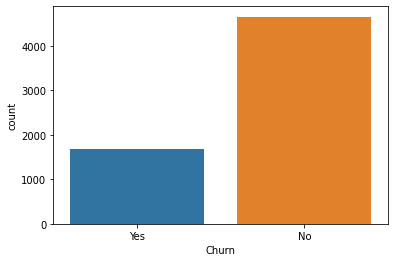

In [4]:
import seaborn as sns

sns.countplot(x = 'Churn', data = df);

**31% of customers stayed with the company one year or less, 20% between 5 and 6 years,and 32% between 1 year to 4 years**

In [5]:
#Tenure: Number of months the customer has stayed with the company
df.tenure.value_counts(bins = 6, normalize= True)

(-0.073, 12.0]    0.310981
(60.0, 72.0]      0.197854
(12.0, 24.0]      0.146734
(48.0, 60.0]      0.119123
(24.0, 36.0]      0.117861
(36.0, 48.0]      0.107447
Name: tenure, dtype: float64

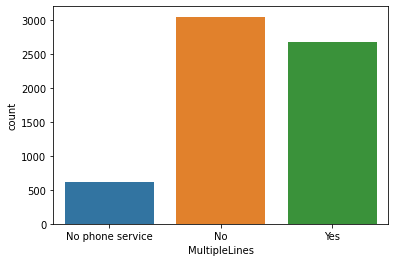

In [6]:
sns.countplot(x = 'MultipleLines', data = df);

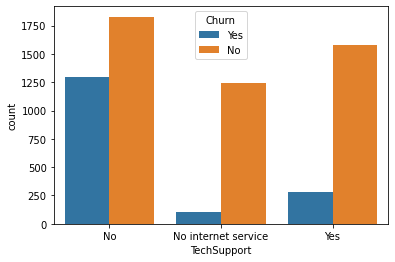

In [7]:
sns.countplot(x = 'TechSupport', hue = 'Churn', data = df);

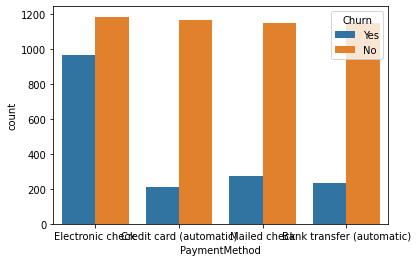

In [8]:
sns.countplot(x='PaymentMethod', hue = 'Churn', data = df);

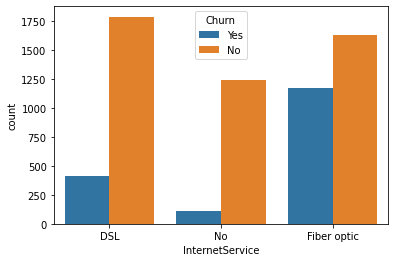

In [9]:
sns.countplot(x='InternetService', hue = 'Churn', data = df);

**%44 percent of customers use fiber optic,%34 percent DSL, and %21 don't use internet service**

In [10]:
df.InternetService.value_counts(normalize= True)

Fiber optic    0.441149
DSL            0.346008
No             0.212843
Name: InternetService, dtype: float64

In [11]:
df.PaymentMethod.value_counts()

Electronic check             2150
Mailed check                 1424
Bank transfer (automatic)    1386
Credit card (automatic)      1378
Name: PaymentMethod, dtype: int64

In [12]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.020302,0.216512
tenure,0.020302,1.000000,0.253420
MonthlyCharges,0.216512,0.253420,1.000000


In [13]:
categorical_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

df = pd.get_dummies(df, columns= categorical_cols)

In [14]:
df['Churn'] = df['Churn'].replace(['Yes','No'],[1,0])

In [15]:
#we don't need ID in predictive model, TotalCharges column was problematic I tried many solutions but it didn't converted to float
cols = ['customerID','TotalCharges']
df = df.drop(columns=cols, axis =1)

In [16]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,18,39.05,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,0,66,19.95,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,39,99.95,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0,10,95.25,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,27,56.70,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


# **3. Modeling**

## Setting up a simple Logistic Regression
[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

In [18]:
X = df.loc[:, df.columns != 'Churn']
y = df.Churn

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

Fit the model...

Note: I skipped a step in setting up the data...

In [20]:
LR.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions...

In [21]:
predicted = LR.predict(x_test)

In [22]:
from sklearn.metrics import *

accuracy_score(y_test, predicted)


0.8056782334384858

In [23]:
recall_score(y_test, predicted)

0.5576036866359447

In [24]:
f1_score(y_test, predicted)

0.6111111111111112

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion = confusion_matrix(y_test, predicted)
confusion


array([[1035,  116],
       [ 192,  242]])

## **3. Ideas for customer retention**

- customers who don't have tech support has high churn rate.
- more than half of customes who pay using electronic check churn.
- customers who use Fiber Optic has high churning rate compared to chustomers who use DSL

From here you'd...

1. Figure our your precision, recall, score, etc..
2. Make it into a pipeline... ([Docs Help](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) | [Basic Skeleton Code Help](https://github.com/gumdropsteve/intro_to_machine_learning/blob/main/day_03/02_assignment.ipynb))
3. Figure out your best hyperparams (GridSearchCV)...
4. Make that model...
5. ...